# Laiba Idrees

# SP22-BAI-022

# LAB NO. 05

# Sir Syed Ahmed Qasim

# Programming for Artificial Intelligence Lab 05

Details about the attached files

1) dialogues_text.txt:

    The DailyDialog dataset which contains 11,318 dialogues.

2) dialogues_act.txt:

    Each line in dialogues_act.txt corresponds to the dialog act annotations in dialogues_text.txt.
                      
    The dialog act number represents: { 1: inform，2: question, 3: directive, 4: commissive }

3) dialogues_emotion.txt:
    
    Each line in dialogues_emotion.txt corresponds to the emotion annotations in dialogues_text.txt.
                          
    The emotion number represents: { 0: no emotion, 1: anger, 2: disgust, 3: fear, 4: happiness, 5: sadness, 6: surprise}

## Task 01

Your task is to merge all these files into a single dataframe. Columns will be as follows

dialog_id

dialog_text

dialog_act

dialog_emotion

In [ ]:
# Expected output of Task 01

,dialog_id,dialog_text,dialog_act,dialog_emotion
0,1,The kitchen stinks .,3,4
1,6,I'll throw out the garbage .,5,7
2,2,"So , how about getting some coffee for tonight ?",6,3


In [2]:
import pandas as pd

# Read the data from the files and strip newline characters
# Read the data from the files and remove "_eou_" from dialogues_text
with open('dialogues_text.txt', 'r') as f:
    dialogues_text = [line.strip().split("_eou_")[0].strip() for line in f.readlines()]

with open('dialogues_act.txt', 'r') as f:
    dialogues_act = [line.strip().split() for line in f.readlines()]
    dialogues_act = [int(''.join(line)) for sublist in dialogues_act for line in sublist]

with open('dialogues_emotion.txt', 'r') as f:
    dialogues_emotion = [line.strip().split() for line in f.readlines()]
    dialogues_emotion = [int(''.join(line)) for sublist in dialogues_emotion for line in sublist]

# Create a list of dictionaries for DataFrame
data = []
for dialog_id, (text, act, emotion) in enumerate(zip(dialogues_text, dialogues_act, dialogues_emotion), start=1):
    row = {
        'dialog_id': dialog_id,
        'dialog_text': text,
        'dialog_act': act,
        'dialog_emotion': emotion
    }
    data.append(row)

# Create a pandas DataFrame from the data
df = pd.DataFrame(data)

# Print the tabular output
df.head(5)

,dialog_id,dialog_text,dialog_act,dialog_emotion
0,1,The kitchen stinks . _,3,2
1,2,"So , how about getting some coffee for tonight...",4,0
2,3,Are things still going badly with your housegu...,3,4
3,4,Would you mind waiting a while ? _,4,2
4,5,Are you going to the annual party ? I can give...,3,0


## Task 02

Next task is to assign label values to dialog_act and dialog_emotion as given in readme.txt

In [3]:
# Expected output of Task 02
import pandas as pd

# Define dictionaries to map dialog act numbers and emotion numbers to labels
dialog_act_labels = {
    1: 'inform',
    2: 'question',
    3: 'directive',
    4: 'commissive'
}

emotion_labels = {
    0: 'no emotion',
    1: 'anger',
    2: 'disgust',
    3: 'fear',
    4: 'happiness',
    5: 'sadness',
    6: 'surprise'
}

# Read the data from the files and strip newline characters
with open('dialogues_text.txt', 'r') as f:
    dialogues_text = [line.strip().split("_eou_")[0].strip() for line in f.readlines()]

with open('dialogues_act.txt', 'r') as f:
    dialogues_act = [line.strip().split() for line in f.readlines()]
    dialogues_act = [int(''.join(line)) for sublist in dialogues_act for line in sublist]

with open('dialogues_emotion.txt', 'r') as f:
    dialogues_emotion = [line.strip().split() for line in f.readlines()]
    dialogues_emotion = [int(''.join(line)) for sublist in dialogues_emotion for line in sublist]

# Create a list of dictionaries for DataFrame
data = []
for dialog_id, (text, act, emotion) in enumerate(zip(dialogues_text, dialogues_act, dialogues_emotion), start=1):
    row = {
        'dialog_id': dialog_id,
        'dialog_text': text,
        'dialog_act': act,
        'dialog_emotion': emotion
    }
    data.append(row)

# Create a pandas DataFrame from the data
df = pd.DataFrame(data)

# Map the dialog act and emotion numbers to labels
df['dialog_act'] = df['dialog_act'].map(dialog_act_labels)
df['dialog_emotion'] = df['dialog_emotion'].map(emotion_labels)

# Print the tabular output
df.head(5)


,dialog_id,dialog_text,dialog_act,dialog_emotion
0,1,The kitchen stinks . _,directive,disgust
1,2,"So , how about getting some coffee for tonight...",commissive,no emotion
2,3,Are things still going badly with your housegu...,directive,happiness
3,4,Would you mind waiting a while ? _,commissive,disgust
4,5,Are you going to the annual party ? I can give...,directive,no emotion


In [ ]:
# YOUR CODE HERE


## Task 03

Apply suitable Graphs from Matplotlib onto this data to visualize it

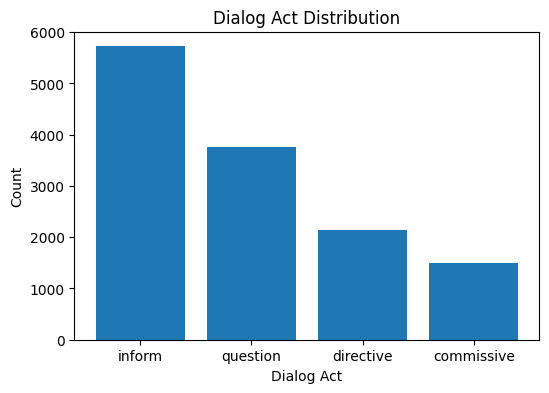

In [ ]:
import matplotlib.pyplot as plt

# Example 1: Bar Plot for Dialog Act Counts
dialog_act_counts = df['dialog_act'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(dialog_act_counts.index, dialog_act_counts.values)
plt.xlabel('Dialog Act')
plt.ylabel('Count')
plt.title('Dialog Act Distribution')
plt.show()


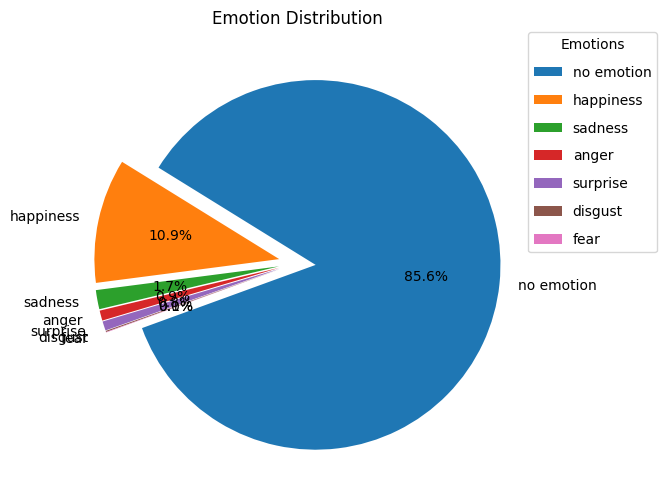

In [ ]:
# Example 2: Pie Chart for Emotion Distribution
emotion_counts = df['dialog_emotion'].value_counts()
plt.figure(figsize=(8, 6))
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(emotion_counts.values, labels=emotion_counts.index, autopct='%1.1f%%', startangle=200,explode=explode)
plt.legend(loc="best", bbox_to_anchor=(1, 1), borderaxespad=0., title="Emotions", labelspacing=1.0)  # Adjust pad and labelspacing

plt.title('Emotion Distribution')
plt.show()


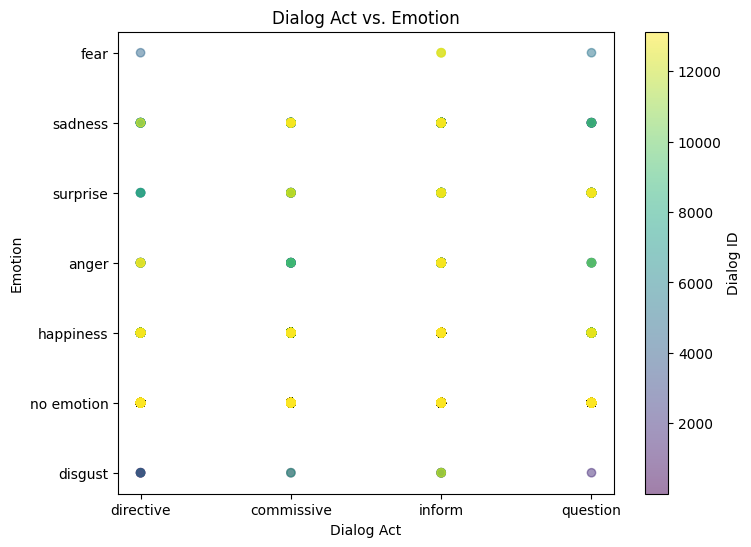

In [ ]:
# Example 3: Scatter Plot for Dialog Act vs. Emotion
plt.figure(figsize=(8, 6))
plt.scatter(df['dialog_act'], df['dialog_emotion'], c=df['dialog_id'], cmap='viridis', alpha=0.5)
plt.xlabel('Dialog Act')
plt.ylabel('Emotion')
plt.title('Dialog Act vs. Emotion')
plt.colorbar(label='Dialog ID')
plt.show()

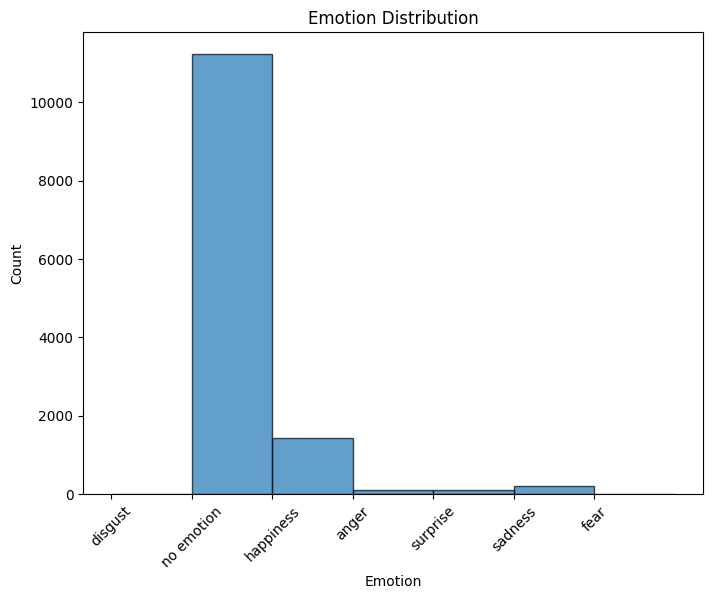

In [ ]:
# Example 4: Histogram for Emotion Distribution
plt.figure(figsize=(8, 6))
plt.hist(df['dialog_emotion'], bins=range(8), edgecolor='black', alpha=0.7)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution')
plt.xticks(range(7), df['dialog_emotion'].unique(), rotation=45)
plt.show()